In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data=pd.read_csv('headbrain.csv')
data.sort_values("Head Size(cm^3)", inplace = True)
#data.at[209, "Head Size(cm^3)"] = 6000 #outlier
#polynomial reg is extremely sensitive to outliers

In [11]:
x=data['Head Size(cm^3)'].values
y=data['Brain Weight(grams)'].values


In [12]:
# x = np.array(range(0,100))
# a = np.array(2*x+3)
# y = np.array([(2*x+1) for x in x])
# x,y

In [17]:
x=x/max(x)
y=y/max(y)
x,y

(array([0.57299347, 0.58415842, 0.6018538 , 0.60332842, 0.61870655,
        0.61912787, 0.62966084, 0.63197809, 0.64419633, 0.64609227,
        0.64651359, 0.64693491, 0.64925216, 0.65093743, 0.65199073,
        0.65388667, 0.65809985, 0.6625237 , 0.66484095, 0.66484095,
        0.66526227, 0.66673689, 0.66673689, 0.66779018, 0.66800084,
        0.66884348, 0.67010744, 0.67474194, 0.6770592 , 0.67790183,
        0.68000843, 0.68106172, 0.68380029, 0.68422161, 0.68443227,
        0.68822414, 0.6884348 , 0.68864546, 0.69033074, 0.69075205,
        0.69180535, 0.69349063, 0.69454392, 0.69559722, 0.69707183,
        0.69896777, 0.69896777, 0.70002107, 0.70128502, 0.70233832,
        0.70444491, 0.70613019, 0.70655151, 0.70739414, 0.70781546,
        0.70823678, 0.71034337, 0.71223931, 0.71266063, 0.71392458,
        0.7143459 , 0.7143459 , 0.71476722, 0.71497788, 0.71497788,
        0.71497788, 0.71603118, 0.71603118, 0.7164525 , 0.71666316,
        0.71750579, 0.71898041, 0.71940173, 0.72

time taken for linear reg =  23.932748079299927


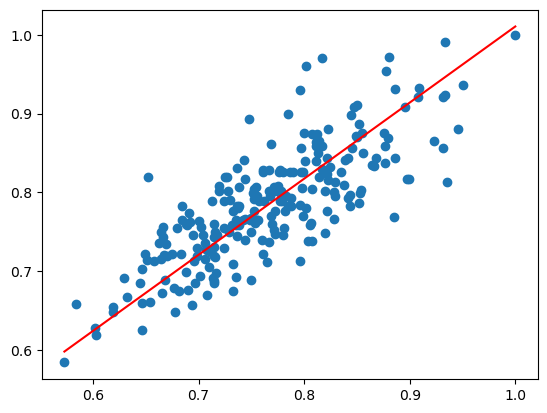

In [18]:
#x = np.array(range(10,100))
#y = np.array([2*x+3 for x in x])

import time
start_time_linear = time.time()

errorlist = []
def gd(updtd_w, updtd_b, learning_rate, n):
    for i in range(n):
        derv_jw_w, derv_jw_b = d_jw(updtd_w, updtd_b)
        lrdb = learning_rate*derv_jw_b 
        lrdw = learning_rate*derv_jw_w
        lrdb = round(lrdb, 8) ##note 
        lrdw = round(lrdw, 8)
        updtd_w = updtd_w - lrdw
        updtd_b = updtd_b - lrdb
    return updtd_w, updtd_b

def d_jw(w, b):
    sum_of_sqrderror=0
    derivative_of_jw_wrt_w = 0
    derivative_of_jw_wrt_b = 0
    sum_of_jw_wrt_w = 0
    sum_of_jw_wrt_b = 0
    for i in range(len(x)):
        predicted_y = w*x[i] + b
        predicted_y = round(predicted_y,8)
        error = (predicted_y - y[i])
        error = round(error, 8)
        each_dw_error = error*x[i]
        sum_of_jw_wrt_w = sum_of_jw_wrt_w + each_dw_error
        sum_of_jw_wrt_b = sum_of_jw_wrt_b + error
        sum_of_jw_wrt_w = round(sum_of_jw_wrt_w, 8)
        sum_of_jw_wrt_b = round(sum_of_jw_wrt_b, 8)
    errorlist.append(sum_of_jw_wrt_b)
    derivative_of_jw_wrt_w = 1/len(x) * sum_of_jw_wrt_w
    derivative_of_jw_wrt_b = 1/len(x) * sum_of_jw_wrt_b
    derivative_of_jw_wrt_w = round(derivative_of_jw_wrt_w, 8)
    derivative_of_jw_wrt_b = round(derivative_of_jw_wrt_b, 8)
    return derivative_of_jw_wrt_w, derivative_of_jw_wrt_b
w,b=gd(10,10,.09,5000)
plt.scatter(x,y)
plt.plot(x,[w*x+b for x in x],"r")
end_time_linear=time.time()
print("time taken for linear reg = ", end_time_linear - start_time_linear)

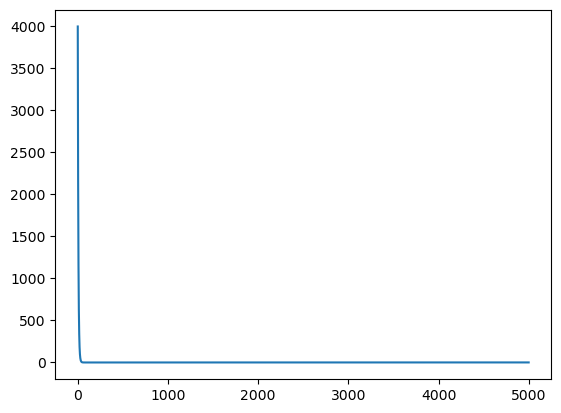

In [19]:
plt.plot(errorlist)

In [16]:
from sklearn.metrics import r2_score
y_hat=[w*x+b for x in x]
r2 = r2_score(y, y_hat)
r2

0.6336071510185761

time for polynomial reg =  0.4251687526702881


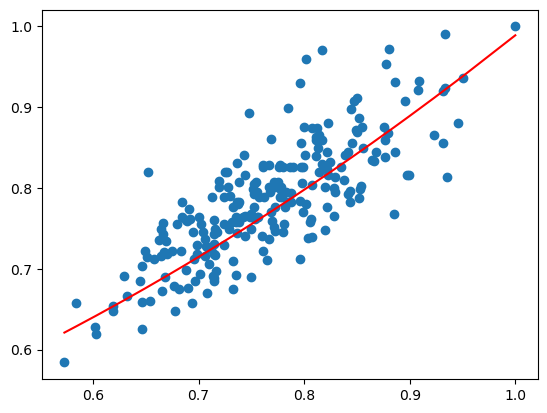

In [20]:
#x = np.array(range(10,100))
#y = np.array([2*x+3 for x in x])
import time
start_time_polynomial = time.time()

errorlistw1 = []
errorlistw2 = []
errorlistb = []
def gd(updtd_w1, updtd_w2, updtd_b, learning_rate, n):
    for i in range(n):
        derv_jw_w1,derv_jw_w2, derv_jw_b = d_jw(updtd_w1,updtd_w2, updtd_b)
        lrdb = learning_rate*derv_jw_b 
        lrdw1 = learning_rate*derv_jw_w1
        lrdw2 = learning_rate*derv_jw_w2
        lrdb = round(lrdb, 8) ##note 
        lrdw1 = round(lrdw1, 8)
        lrdw2 = round(lrdw2, 8)
        updtd_w1 = updtd_w1 - lrdw1
        updtd_w2 = updtd_w2 - lrdw2
        updtd_b = updtd_b - lrdb
    return updtd_w1,updtd_w2, updtd_b

def d_jw(w1,w2, b):
    derivative_of_jw_wrt_w1 = 0
    derivative_of_jw_wrt_w2 = 0
    derivative_of_jw_wrt_b = 0
    total_cost_function = 0
    total_cost_function_mult_x2 = 0
    total_cost_function_mult_x = 0
    total_cost_function_mult_1 = 0
    sum_of_jw_wrt_w1 = 0
    sum_of_jw_wrt_w2 = 0
    sum_of_jw_wrt_b = 0
    for i in range(len(x)):
        predicted_y = w1*x[i]**2+w2*x[i] + b
        predicted_y = round(predicted_y,8)
        error = (predicted_y - y[i])**2
        error = round(error, 8)
        total_cost_function_mult_x2 =total_cost_function_mult_x2 + error*(x[i]**2)
        total_cost_function_mult_x = total_cost_function_mult_x + error**x[i]
        total_cost_function_mult_1 = total_cost_function_mult_1 + error
        total_cost_function = round(total_cost_function, 8)
    errorlistb.append(error)
    derivative_of_jw_wrt_w1 = 1/(len(x)) * total_cost_function_mult_x2
    derivative_of_jw_wrt_w2 = 1/(len(x)) * total_cost_function_mult_x
    derivative_of_jw_wrt_b = 1/(len(x)) * total_cost_function_mult_1
    derivative_of_jw_wrt_w1 = round(derivative_of_jw_wrt_w1, 8)
    derivative_of_jw_wrt_w2 = round(derivative_of_jw_wrt_w2, 8)
    derivative_of_jw_wrt_b = round(derivative_of_jw_wrt_b, 8)
    return derivative_of_jw_wrt_w1,derivative_of_jw_wrt_w2, derivative_of_jw_wrt_b
w1,w2,b=gd(0.5,0.5,.5,.1,100)
plt.scatter(x,y)
plt.plot(x,[w1*x**2+w2*x+b for x in x],"r")
end_time_polynomial=time.time()
print("time for polynomial reg = ", end_time_polynomial - start_time_polynomial)

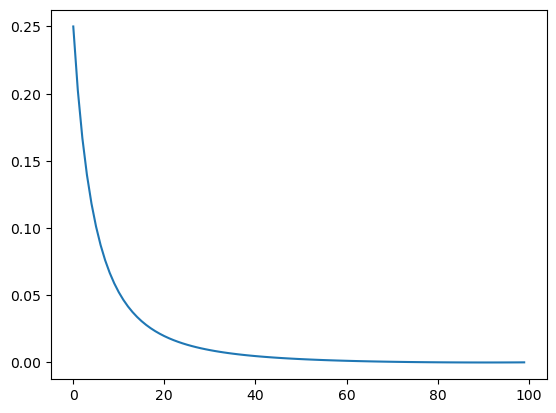

In [21]:
plt.plot(errorlistb)

In [22]:
a1,a2,k,j = symbols('a1,a2,k,j ')
f = (a1*k**2+a2*k+j)**2
df = diff(f, a2)
df

NameError: name 'symbols' is not defined

In [23]:
r2 = r2_score(y, [w1*x**2+w2*x+b for x in x])
r2

0.5886275728351982